In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [4]:
import seaborn as sns
# Load the dataset
tips = sns.load_dataset("tips")

# Display the first few rows of the dataset
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [6]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
#Task 1: Check total number of rows and columns in the dataset.
print(tips.shape)

(244, 7)


In [14]:
#Task 2: Checking if all data types are appearing correctly or not.
print("Data types:\n", tips.dtypes)

Data types:
 total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [16]:
#Task 3: Check if any column has null values.
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [20]:
#Task 4: Check in any column has meaningless special characters. Cleaning is not required.
print("Special characters (non-alphanumeric):\n", tips.select_dtypes(include='object').apply(lambda x: x[x.str.contains('[^a-zA-Z0-9 ]')].count()))

Special characters (non-alphanumeric):
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[244 rows x 0 columns]


In [32]:
#Task 5: Check if any row is a duplicate.

duplicates = tips[tips.duplicated()]
# If you want to see all duplicate rows (including the original)
all_duplicates = tips[tips.duplicated(keep=False)]
print(duplicates)
print(all_duplicates)

     total_bill  tip     sex smoker   day   time  size
202        13.0  2.0  Female    Yes  Thur  Lunch     2
     total_bill  tip     sex smoker   day   time  size
198        13.0  2.0  Female    Yes  Thur  Lunch     2
202        13.0  2.0  Female    Yes  Thur  Lunch     2


In [34]:
#Task 6: Find which columns are categorical and which are numerical.
def separate_data_types(tips):
  categorical = []
  numerical = []
  for col in tips.columns:
    if tips[col].nunique() < 100:
      categorical.append(col)
    else:
      numerical.append(col)
  return categorical,numerical

categorical, numerical  = separate_data_types(tips)

table = [categorical,numerical]
print(tabulate({"Categorical":categorical,
                "Numerical":numerical},headers = ["Categorical","Numerical"]))

Categorical    Numerical
-------------  -----------
sex            total_bill
smoker         tip
day
time
size


In [38]:
#Task 7: Check if data has outliers. Specify column names for those outliers are present.
def check_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

for col in numerical:
    outliers = check_outliers(tips, col)
    if not outliers.empty:
        print(f"Outliers in column '{col}':\n", outliers)

Outliers in column 'total_bill':
      total_bill    tip     sex smoker   day    time  size
59        48.27   6.73    Male     No   Sat  Dinner     4
102       44.30   2.50  Female    Yes   Sat  Dinner     3
142       41.19   5.00    Male     No  Thur   Lunch     5
156       48.17   5.00    Male     No   Sun  Dinner     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
182       45.35   3.50    Male    Yes   Sun  Dinner     3
184       40.55   3.00    Male    Yes   Sun  Dinner     2
197       43.11   5.00  Female    Yes  Thur   Lunch     4
212       48.33   9.00    Male     No   Sat  Dinner     4
Outliers in column 'tip':
      total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
47        32.40   6.00    Male     No   Sun  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
183       2

In [42]:
#Task 8: Perform univariate analysis by calculating the frequency distribution of the "sex" column.
sex_distribution = tips['sex'].value_counts()
print("Frequency distribution of 'sex':\n", sex_distribution)

Frequency distribution of 'sex':
 sex
Male      157
Female     87
Name: count, dtype: int64


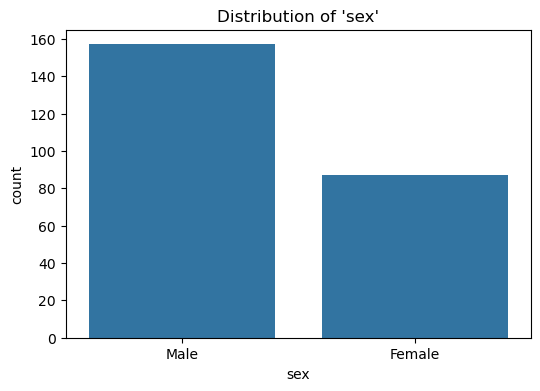

In [46]:
#Task 9: Create a bar chart to visualize the distribution of the "sex" column in the dataset tip dataset.
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=tips)
plt.title("Distribution of 'sex'")
plt.show()

In [50]:
#Task 10: Display the count of missing values in the "smoker" column of the dataset tip dataset.
missing_smoker = tips['smoker'].isnull().sum()
print("Missing values in 'smoker':", missing_smoker)

Missing values in 'smoker': 0


In [52]:
#Task 11: Calculate the mode of the "day" column in the dataset "tips", If there are multiple modes, display all of them.
modes = tips['day'].mode()
print(modes)

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']


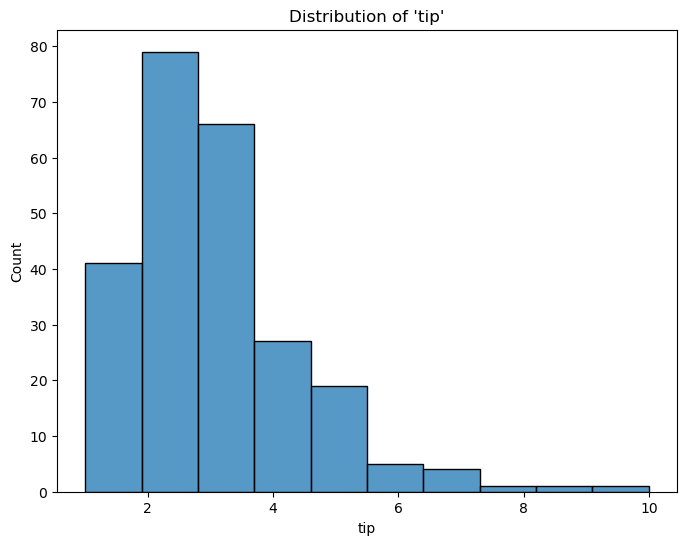

In [60]:
#Task 12: Create a histogram to visualize the distribution of the "tip" column in the dataset "tips”, Set appropriate bins for better representation.
plt.figure(figsize=(8, 6))
sns.histplot(tips['tip'], bins=10) 
plt.title("Distribution of 'tip'")
plt.show()

In [64]:
#Task 13: Calculate the skewness and kurtosis of the "total_bill" column in the dataset "tips." Interpret the results in terms of data distribution.
skewness = tips['total_bill'].skew()
kurtosis = tips['total_bill'].kurtosis()
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: 1.1332130376158205
Kurtosis: 1.2184840156638854


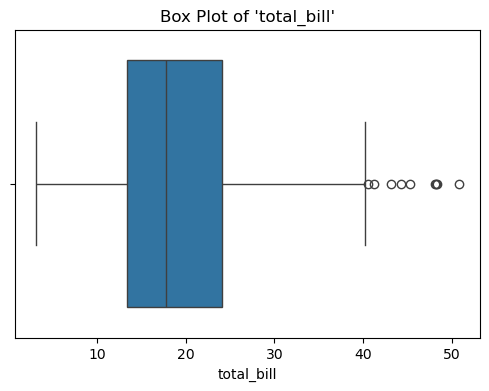

In [72]:
#Task 14: Create a box plot to identify outliers in the "total_bill" column of the dataset "tips" Interpret the presence of outliers.
plt.figure(figsize=(6, 4))
sns.boxplot(x='total_bill', data=tips)
plt.title("Box Plot of 'total_bill'")
plt.show()

In [76]:
#Task 15: Perform a quantile analysis on the "tip" column of the dataset "tips" Calculate the 25th, 50th, and 75th percentiles.
percentiles = tips['tip'].quantile([0.25, 0.5, 0.75])
print("Percentiles of 'tip':\n", percentiles)

Percentiles of 'tip':
 0.25    2.0000
0.50    2.9000
0.75    3.5625
Name: tip, dtype: float64


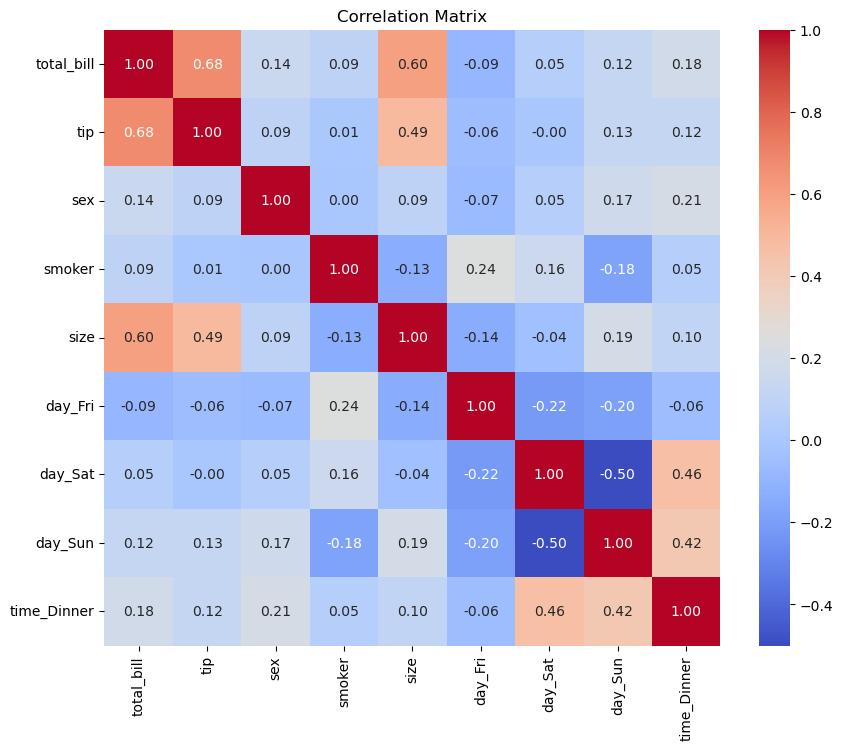

In [78]:
#Task 16: Plot the correlation matrix & write the interpretation
tips['sex'] = tips['sex'].map({'Male': 1, 'Female': 0})
tips['smoker'] = tips['smoker'].map({'Yes': 1, 'No': 0})
# If 'day' and 'time' are categorical, convert them as well if needed
tips = pd.get_dummies(tips, columns=['day', 'time'], drop_first=True)

# Calculate the correlation matrix
correlation_matrix = tips.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

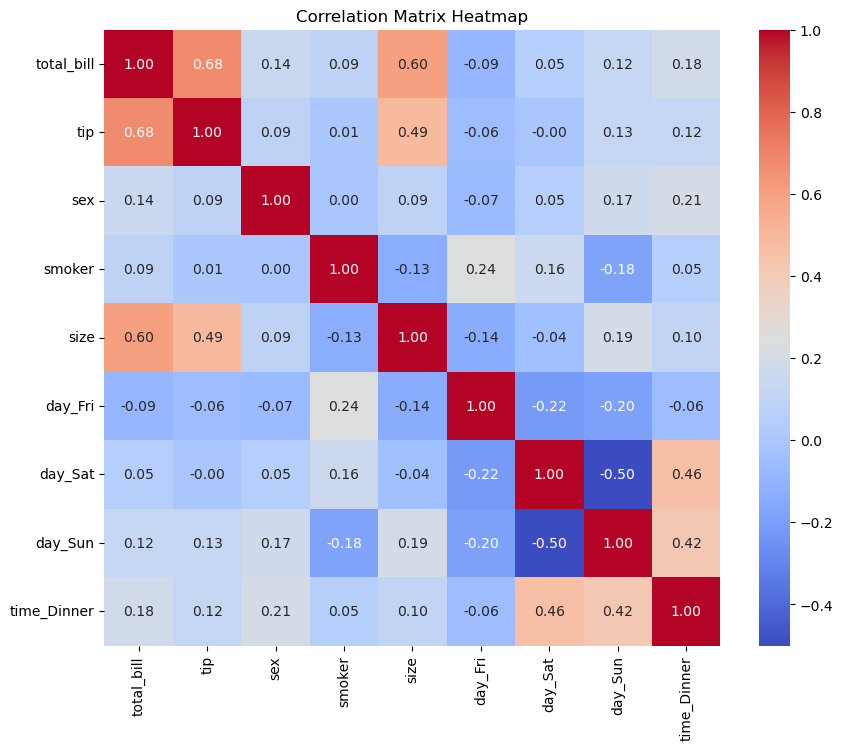

In [80]:
#Task 17: Plot the heatmap & write the interpretation.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#Task 18: Write task-wise Interpretation.
task1:The dataset has 244 rows and 7 columns.
task2:total_bill and tip are floating-point numbers, sex, smoker, day, and time are categorical variables, and size is an integer.
task3:There are no null values in any of the columns of the dataset.
task4:There are no meaningless special characters (non-alphanumeric) found in any of the object-type columns.
task5:There are two duplicate rows in the dataset. The row with index 202 is a duplicate of the row with index 198.
task6:The sex, smoker, day, and time columns are identified as categorical, while the total_bill, tip, and size columns are identified as numerical. This is based on the assumption that columns with fewer than 100 unique values are likely categorical.
task7:Outliers were found in both the total_bill and tip columns. The printed results show the rows that are considered outliers based on the IQR method. These rows have unusually high or low values compared to the majority of the data.
task8:The frequency distribution of the sex column shows that there are 157 males and 87 females in the dataset.
task9:The bar chart shows the distribution of the "sex" column in the dataset. The x-axis represents the two categories of sex: "Male" and "Female". The y-axis represents the count of observations in each category. From the chart, it can be seen that there are more males than females in the dataset.
task10:Missing values in 'smoker': 0
task11:The mode of the "day" column is "Sat". This means that "Saturday" is the most frequently occurring day in the dataset.
task12:The histogram shows the distribution of the tip amounts in the dataset. The x-axis represents the tip amount range divided into 10 bins. The y-axis represents the frequency or count of tips that fall within each bin.
By observing the bar heights, we can see that most tips fall between $0 and $5. The distribution appears to be right-skewed, meaning there are more tips on the lower end and a fewer but larger tips on the higher end. This suggests that most tips are relatively small but there are some outliers with high tip values.
task13:Skewness: A positive skewness of 1.13 indicates that the distribution of the "total_bill" column is right-skewed. This means there is a tail on the right side of the distribution, with a few larger values pulling the mean to the right.
Kurtosis: A kurtosis of 1.22 indicates that the distribution is slightly leptokurtic. This means it has heavier tails and a sharper peak than a normal distribution. There are more extreme values (outliers) compared to a normal distribution.
The distribution of "total_bill" is right-skewed and has slightly heavier tails, suggesting that there are some larger bills that are pulling the mean to the right, and there are more extreme values compared to a normal distribution.
task14:Center line: The line in the middle of the box represents the median, which is the 50th percentile of the data.
Box: The box represents the interquartile range (IQR), which encompasses the middle 50% of the data points. The bottom edge of the box represents the first quartile (Q1) and the top edge represents the third quartile (Q3).
Whiskers: The whiskers extend from the top and bottom of the box. They typically range up to 1.5 IQRs from the quartiles. Data points beyond this range are considered outliers and are plotted individually.
In this case, the box plot shows that there are a few outliers with total bill amounts that are significantly higher than the rest of the data points. The presence of outliers suggests that the distribution of total bill might not be perfectly symmetrical and could be right-skewed, as we saw in the previous task with skewness and kurtosis.
Task15:25th percentile (Q1): 25% of tips are less than or equal to $2.00.
50th percentile (Median): 50% of tips are less than or equal to $2.90.
75th percentile (Q3): 75% of tips are less than or equal to $3.56.
This quantile analysis provides insights into the distribution of tip amounts, showing that the median tip is $2.90, and there is a significant difference between the lower quartile (25%) and the upper quartile (75%), indicating that the distribution of tips is not perfectly symmetrical.
task16:Strong positive correlations exist between 'total_bill' and 'tip', and weak positive correlations exist between 'size' and 'tip'. A weak negative correlation is observed between 'day_Fri' and 'tip'. However, correlation doesn't imply causation.
task17: correlation matrix heatmap shows the relationships between features in the "tips" dataset. Strong positive correlations exist between 'total_bill' and 'tip', and weak positive correlations exist between 'size' and 'tip'. A weak negative correlation is observed between 'day_Fri' and 'tip'. However, correlation doesn't imply causation
